<a href="https://colab.research.google.com/github/BhayuPratap/Cwat/blob/main/Customer_Sentiment_Analysis_Dashboard_for_Product_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurav9786/amazon-product-reviews")

print("Path to dataset files:", path)


100%|██████████| 109M/109M [00:01<00:00, 104MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/saurav9786/amazon-product-reviews/versions/1


In [8]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv("/content/ratings_Electronics (1).csv")

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
1,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
2,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
3,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09
4,A1QGNMC6O1VW39,0511189877,5.0,1.397434e+09


In [9]:
import pandas as pd

# Load the data into pandas DataFrame
df = pd.read_csv('/content/ratings_Electronics (1).csv')

# Show the first few rows of the data
print(df.head())


    AKM1MP6P0OYPR  0132793040  5.0  1365811200
0  A2CX7LUOHB2NDG  0321732944  5.0  1341100800
1  A2NWSAGRHCP8N5  0439886341  1.0  1367193600
2  A2WNBOD3WNDNKT  0439886341  3.0  1374451200
3  A1GI0U4ZRJA8WN  0439886341  1.0  1334707200
4  A1QGNMC6O1VW39  0511189877  5.0  1397433600


Columns in the DataFrame: Index(['User ID', 'Product ID', 'Rating', 'Time stamp'], dtype='object')


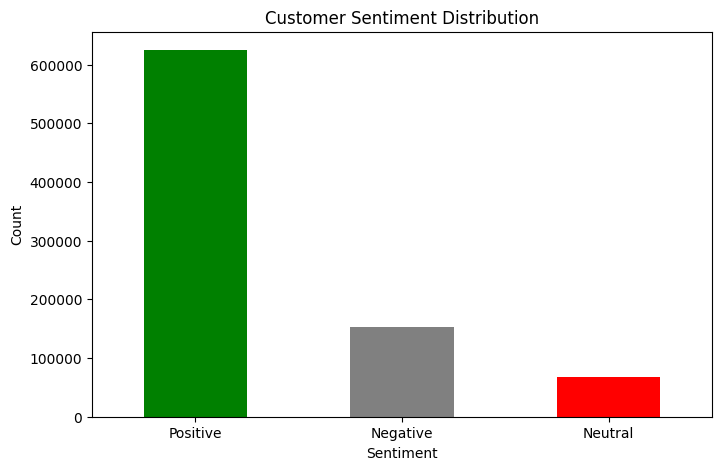

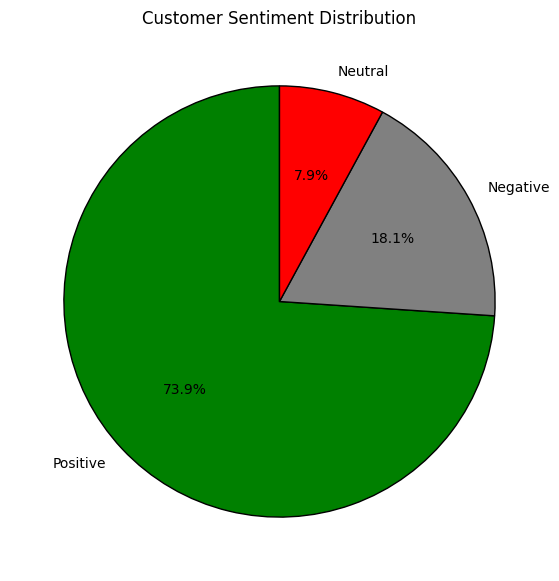

               User ID  Product ID  Rating Sentiment                Date
0       A2CX7LUOHB2NDG   321732944       5  Positive 2012-07-01 00:00:00
1       A2NWSAGRHCP8N5   439886341       1  Negative 2013-04-29 00:00:00
2       A2WNBOD3WNDNKT   439886341       3   Neutral 2013-07-22 00:00:00
3       A1GI0U4ZRJA8WN   439886341       1  Negative 2012-04-18 00:00:00
4       A1QGNMC6O1VW39   511189877       5  Positive 2014-04-14 00:00:00
...                ...         ...     ...       ...                 ...
844919   AHVKXKRRLHBZD  B000EC8WEU       4  Positive 2009-01-30 00:00:00
844920  A1REPQB2CCCY2S  B000EC8WEU       3   Neutral 2007-01-09 00:00:00
844921   ADM5D4TQE0JES  B000EC8WEU       5  Positive 2007-04-04 00:00:00
844922  A1LMXPIOLLI867  B000EC8WEU       5  Positive 2008-09-01 00:00:00
844923   AOF72GZLS9OYI  B000EC8WEU       3   Neutral 1970-01-01 00:20:19

[844924 rows x 5 columns]


In [14]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
# Make sure you have the path to the CSV file, for example, 'data.csv'
df = pd.read_csv('/content/ratings_Electronics (1).csv')

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Step 2: Check the column names to ensure 'Time stamp' is available
print("Columns in the DataFrame:", df.columns)

# Step 3: Convert the timestamp to a readable date format
df['Date'] = pd.to_datetime(df['Time stamp'], unit='s')

# Step 4: Define sentiment analysis based on rating
def analyze_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

# Apply sentiment analysis
df['Sentiment'] = df['Rating'].apply(analyze_sentiment)

# Step 5: Visualize the Sentiment Distribution

# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Customer Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Alternatively, you can plot a pie chart:
plt.figure(figsize=(7, 7))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'gray', 'red'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Customer Sentiment Distribution')
plt.ylabel('')  # Hide y-axis label
plt.show()

# Step 6: Save the cleaned DataFrame with sentiments for future analysis
df.to_csv('cleaned_sentiment_data.csv', index=False)

# Optionally, display the DataFrame with the sentiment analysis
print(df[['User ID', 'Product ID', 'Rating', 'Sentiment', 'Date']])
